Matplotlib is building the font cache; this may take a moment.


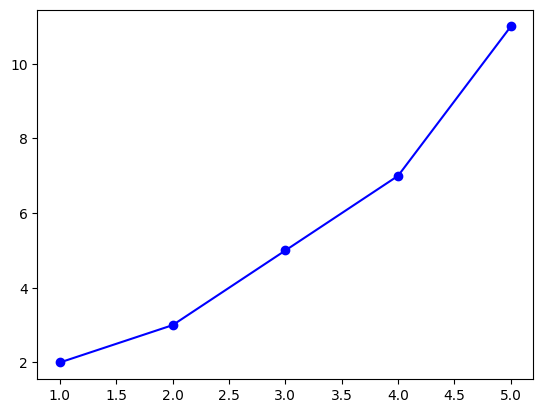

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

plt.plot(x, y, marker='o', linestyle='-', color='b', label='Prime Numbers')

plt.show()

In [ ]:
class StudentScores:
    def __init__(self, filename):
        self.scores = {}
        try:
            with open(filename, encoding='utf-8') as f:
                for line in f:
                    line = line.strip()
                    if not line:
                        continue
                    name, score = line.split(',')
                    self.scores[name] = int(score)
        except Exception as e:
            print('파일 열기 오류:', e)

    def calculate_average(self):
        if not self.scores:
            return 0
        return sum(self.scores.values()) / len(self.scores)

    def get_above_average(self):
        avg = self.calculate_average()
        return [n for n, s in self.scores.items() if s >= avg]

    def save_below_average(self, out_filename):
        avg = self.calculate_average()
        with open(out_filename, 'w', encoding='utf-8') as f:
            for n, s in self.scores.items():
                if s < avg:
                    f.write(f'{n},{s}\n')

    def print_summary(self):
        avg = self.calculate_average()
        above = self.get_above_average()
        print('학생 수:', len(self.scores))
        print('평균 점수: {:.2f}'.format(avg))
        print('평균 이상인 학생:', ', '.join(above) if above else '없음')



In [ ]:
class StudentScores:
    def __init__(self, filename):
        
        #생성자: 파일을 읽고 학생 데이터를 딕셔너리에 저장
       
        
        self.filename = filename
        self.scores = {}  # 학생 이름(key): 점수(value) 저장 딕셔너리
        try:
            with open(self.filename, 'r', encoding='utf-8') as file:
                for line in file:
                    name, score = line.strip().split(',')  # 한 줄 읽고 쉼표로 분리
                    self.scores[name] = int(score)  # 점수는 정수형으로 변환 후 저장
        except FileNotFoundError:
            print(f"오류: {self.filename} 파일을 찾을 수 없습니다.")
        except Exception as e:
            print(f"오류 발생: {e}")

    def calculate_average(self):
        
        #평균 점수 계산
        
        if not self.scores:  # 데이터가 비어있으면 0 반환
            return 0
        total_score = sum(self.scores.values())  # 점수 총합
        return total_score / len(self.scores)  # 학생 수로 나누어 평균 계산

    def get_above_average(self):
        #평균 이상 점수를 받은 학생들의 이름 리스트 반환
        
        average = self.calculate_average()
        above_average_students = [name for name, score in self.scores.items() if score >= average]
        return above_average_students

    def save_below_average(self, output_filename):
        
        #평균 미만 학생들의 데이터를 지정된 파일에 저장
       
        average = self.calculate_average()
        try:
            with open(output_filename, 'w', encoding='utf-8') as file:
                for name, score in self.scores.items():
                    if score < average:
                        file.write(f"{name},{score}\n")  # 이름과 점수를 파일에 기록
        except Exception as e:
            print(f"파일 저장 오류: {e}")

    def print_summary(self):

        #평균 점수 및 평균 이상 학생 리스트 출력
    
        average = self.calculate_average()
        above_average_students = self.get_above_average()

        print(f"전체 학생 수: {len(self.scores)}명")
        print(f"평균 점수: {average:.2f}점")
        print("평균 이상 학생 목록:")
        for student in above_average_students:
            print(f"- {student}")

if __name__ == "__main__":
    filename = "scores_korean.txt"               # 입력 파일명
    output_filename = "below_average_korean.txt" # 출력 파일명

    student_scores = StudentScores(filename)     # 클래스 인스턴스 생성
    student_scores.print_summary()               # 요약 출력
    student_scores.save_below_average(output_filename) # 평균 미만 학생 저장


전체 학생 수: 5명
평균 점수: 86.60점
평균 이상 학생 목록:
- 박영희
- 최다은
- 강은지


In [ ]:
import re
import csv
import os
from collections import Counter

def extract_ips(file_path):
    #로그 파일에서 IP 주소 추출
    ip_pattern = re.compile(r'\b(?:\d{1,3}\.){3}\d{1,3}\b')  # IPv4 패턴
    ips = []

    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                found_ips = ip_pattern.findall(line)
                ips.extend(found_ips)
    except FileNotFoundError:
        print("파일을 찾을 수 없습니다. 경로를 확인하세요.")
    except Exception as e:
        print(f"오류 발생: {e}")

    return ips

def count_ips(ips):
    #IP 빈도 계산
    return Counter(ips)

def save_to_csv(counter, output_path):
    """CSV 파일로 결과 저장"""
    try:
        with open(output_path, 'w', newline='', encoding='utf-8-sig') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['IP Address', 'Count'])
            for ip, count in counter.items():
                writer.writerow([ip, count])
        print(f"CSV 파일 저장 완료: {output_path}")
    except Exception as e:
        print(f"CSV 저장 중 오류 발생: {e}")

def main():
    file_path = input("분석할 로그 파일 경로를 입력하세요: ")

    if not os.path.exists(file_path):
        print("입력한 파일이 존재하지 않습니다.")
        return

    ips = extract_ips(file_path)
    if not ips:
        print("로그 파일에서 IP를 찾을 수 없습니다.")
        return

    ip_counts = count_ips(ips)

    print("\n접속 빈도 상위 3개 IP:")
    for ip, count in ip_counts.most_common(3):
        print(f"{ip} - {count}회")

    output_csv = 'ip_analysis.csv'
    save_to_csv(ip_counts, output_csv)

if __name__ == "__main__":
    main()



접속 빈도 상위 3개 IP:
203.0.113.5 - 17회
192.168.0.3 - 14회
192.168.0.2 - 14회
CSV 파일 저장 완료: ip_analysis.csv


C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1881212135.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.monthly_sales = self.sales_data.resample('M').sum()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1881212135.py:31: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1881212135.py:31: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1881212135.py:31: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1881212135.py:31: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1881212135.py:31: UserWarning: Glyph 50948 (\N{HANG

             Sales
Date              
2024-01-31  160981
2024-02-29  175652
2024-03-31  149632
2024-04-30  143583
2024-05-31  148914
2024-06-30  170451
2024-07-31  189494
2024-08-31  179111
2024-09-30  159773
2024-10-31  169329
2024-11-30  175207
2024-12-31  178219


C:\Users\ez\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ez\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ez\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ez\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ez\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SY

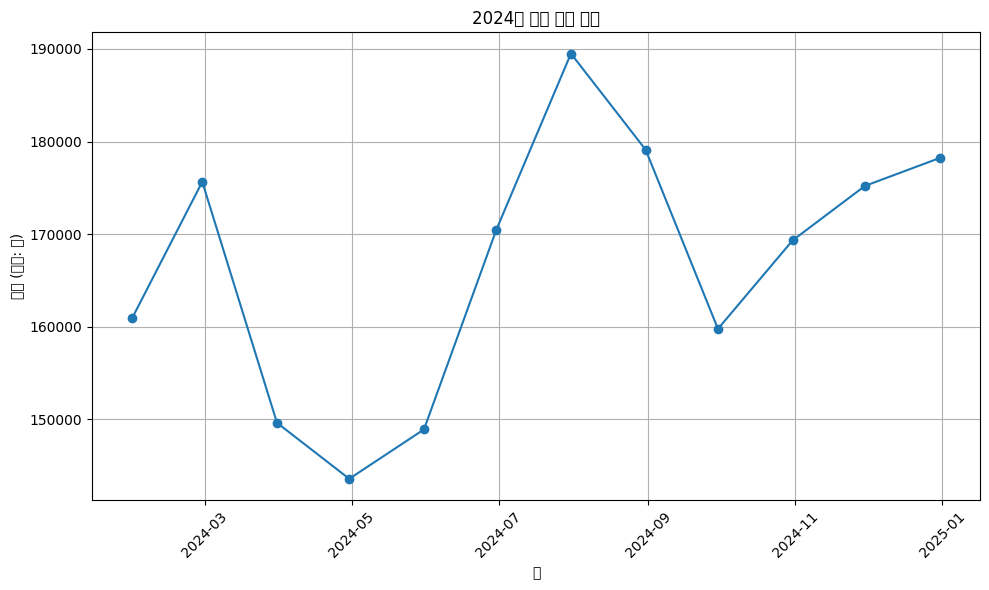

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class SalesAnalysis:
    def __init__(self):
        # 2024년 날짜 생성
        self.dates = pd.date_range(start='2024-01-01', end='2024-12-31')
        
        # 일별 매출 데이터 생성 (1000 ~ 10000 사이 난수)
        self.daily_sales = np.random.randint(1000, 10000, size=len(self.dates))
        
        # 데이터프레임 생성 및 인덱스 설정
        self.sales_data = pd.DataFrame({'Date': self.dates, 'Sales': self.daily_sales})
        self.sales_data.set_index('Date', inplace=True)
    
    def aggregate_monthly_sales(self):
        # 월별 매출 총합 계산
        self.monthly_sales = self.sales_data.resample('M').sum()
        return self.monthly_sales
    
    def visualize_sales(self):
        # 꺾은선 그래프 시각화
        plt.figure(figsize=(10, 6))
        plt.plot(self.monthly_sales.index, self.monthly_sales['Sales'], marker='o')
        plt.title('2024년 월별 매출 추이')
        plt.xlabel('월')
        plt.ylabel('매출 (단위: 원)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# 실행 예시
analysis = SalesAnalysis()
monthly_sales = analysis.aggregate_monthly_sales()
print(monthly_sales)
analysis.visualize_sales()


             Sales
Date              
2024-01-31  158945
2024-02-29  178020
2024-03-31  169190
2024-04-30  164824
2024-05-31  157687
2024-06-30  160933
2024-07-31  177993
2024-08-31  186626
2024-09-30  151366
2024-10-31  183468
2024-11-30  149654
2024-12-31  160108


C:\Users\ez\AppData\Local\Temp\ipykernel_1624\187913541.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.monthly_sales = self.sales_data.resample('M').sum()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\187913541.py:32: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\187913541.py:32: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\187913541.py:32: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\187913541.py:32: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\187913541.py:32: UserWarning: Glyph 50948 (\N{HANGUL SYL

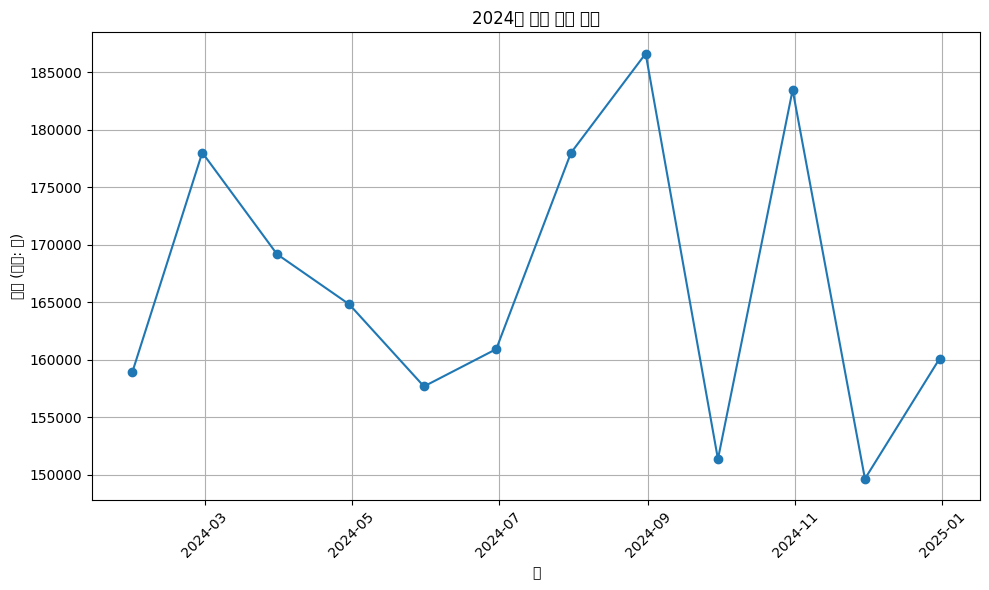

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


class SalesAnalysis:
    def __init__(self):
        # 2024년 모든 날짜 생성
        self.dates = pd.date_range(start='2024-01-01', end='2024-12-31')
        
        # 각 날짜에 대해 1000~10000 사이의 난수로 매출 데이터를 생성
        self.daily_sales = np.random.randint(1000, 10000, size=len(self.dates))
        
        # 날짜와 매출 데이터를 포함한 데이터프레임을 생성하고, 날짜를 인덱스로 설정
        self.sales_data = pd.DataFrame({'Date': self.dates, 'Sales': self.daily_sales})
        self.sales_data.set_index('Date', inplace=True)

    def aggregate_monthly_sales(self):
        # 일별 데이터를 월별로 집계
        self.monthly_sales = self.sales_data.resample('M').sum()
        return self.monthly_sales

    def visualize_sales(self):
        # 월별 매출 데이터를 꺾은선 그래프로 시각화
        plt.figure(figsize=(10, 6))
        plt.plot(self.monthly_sales.index, self.monthly_sales['Sales'], marker='o')  # 꺾은선 그래프
        plt.title('2024년 월별 매출 추이')
        plt.xlabel('월')
        plt.ylabel('매출 (단위: 원)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()  # 그래프 출력


analysis = SalesAnalysis()  # 클래스 인스턴스 생성
monthly_sales = analysis.aggregate_monthly_sales()  # 월별 매출 집계
print(monthly_sales)  # 집계 결과 출력
analysis.visualize_sales()  # 시각화 실행


          Sales
Month          
2024-01  192900
2024-02  164172
2024-03  145210
2024-04  197921
2024-05  159740
2024-06  170316
2024-07  182893
2024-08  178006
2024-09  140635
2024-10  188259
2024-11  162030
2024-12  200009


C:\Users\ez\AppData\Local\Temp\ipykernel_1624\785836088.py:35: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\785836088.py:35: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\785836088.py:35: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\785836088.py:35: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\785836088.py:35: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\785836088.py:35: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.

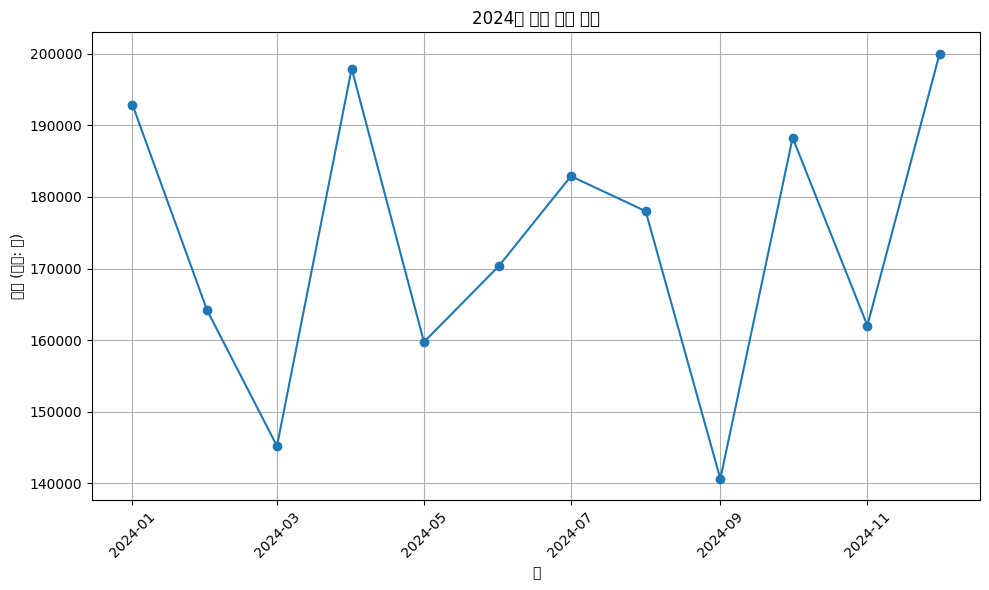

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


class SalesAnalysis:
    def __init__(self):
        # 2024년의 모든 날짜를 생성
        self.dates = pd.date_range(start='2024-01-01', end='2024-12-31')
        
        # 각 날짜에 대해 1000~10000 사이의 난수로 매출 데이터를 생성
        self.daily_sales = np.random.randint(1000, 10000, size=len(self.dates))
        
        # 날짜와 매출 데이터를 포함한 데이터프레임을 생성하고, 날짜를 인덱스로 설정
        self.sales_data = pd.DataFrame({'Date': self.dates, 'Sales': self.daily_sales})
        self.sales_data.set_index('Date', inplace=True)

    def aggregate_monthly_sales(self):
        # 날짜 인덱스를 월 단위로 변환하여 새로운 열을 추가
        self.sales_data['Month'] = self.sales_data.index.to_period('M')
        
        # 월별로 그룹화하여 매출 총합을 계산
        self.monthly_sales = self.sales_data.groupby('Month').sum()
        return self.monthly_sales

    def visualize_sales(self):
        # 월별 매출 데이터를 꺾은선 그래프로 시각화
        plt.figure(figsize=(10, 6)) 
        plt.plot(self.monthly_sales.index.to_timestamp(), self.monthly_sales['Sales'], marker='o')  # 꺾은선 그래프
        plt.title('2024년 월별 매출 추이')
        plt.xlabel('월')
        plt.ylabel('매출 (단위: 원)') 
        plt.xticks(rotation=45) 
        plt.grid(True) 
        plt.tight_layout() 
        plt.show()  # 그래프 출력

analysis = SalesAnalysis()  # 클래스 인스턴스 생성
monthly_sales = analysis.aggregate_monthly_sales()  # 월별 매출 집계
print(monthly_sales)  # 집계 결과 출력
analysis.visualize_sales()  # 시각화 실행


📊 과목별 평균 점수:
수학    79.45
영어    75.45
과학    79.00
dtype: float64


C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1857189015.py:33: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1857189015.py:33: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1857189015.py:33: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1857189015.py:33: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1857189015.py:33: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1857189015.py:33: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
 

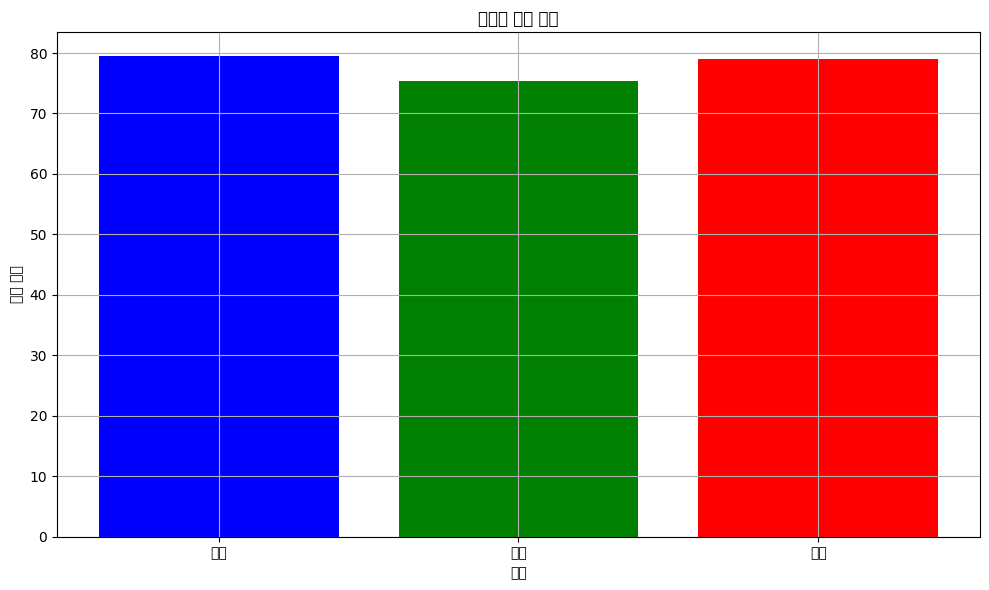


🏆 평균 성적 상위 5명:
      수학   영어  과학         평균
학생12  94  100  98  97.333333
학생2   94   88  90  90.666667
학생16  89   93  90  90.666667
학생4   83   83  99  88.333333
학생20  92   67  89  82.666667


C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1857189015.py:51: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1857189015.py:51: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1857189015.py:51: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1857189015.py:51: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1857189015.py:51: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1857189015.py:51: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu S

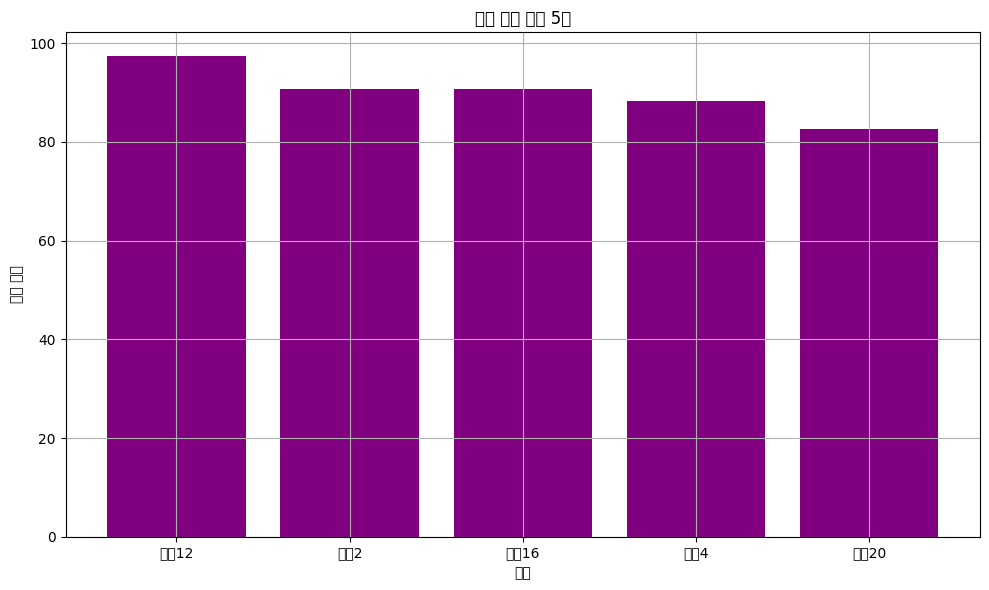

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class StudentScoreAnalysis:
    def __init__(self):
        # 학생 이름 생성
        self.students = [f'학생{i}' for i in range(1, 21)]
        
        # 과목별 성적 데이터 생성 (50 ~ 100 사이 난수)
        self.scores = {
            '수학': np.random.randint(50, 101, size=20),
            '영어': np.random.randint(50, 101, size=20),
            '과학': np.random.randint(50, 101, size=20)
        }
        
        # 데이터프레임 생성
        self.df = pd.DataFrame(self.scores, index=self.students)

    def calculate_subject_averages(self):
        # 과목별 평균 계산
        self.subject_averages = self.df.mean()
        return self.subject_averages

    def visualize_subject_averages(self):
        # 과목별 평균 시각화
        plt.figure(figsize=(10, 6))
        plt.bar(self.subject_averages.index, self.subject_averages, color=['blue', 'green', 'red'])
        plt.title('과목별 평균 점수')
        plt.xlabel('과목')
        plt.ylabel('평균 점수')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def calculate_student_averages(self):
        # 학생별 평균 계산
        self.df['평균'] = self.df.mean(axis=1)
        self.sorted_students = self.df.sort_values(by='평균', ascending=False)
        return self.sorted_students

    def visualize_top_students(self):
        # 상위 5명 시각화
        top_students = self.sorted_students.head(5)
        plt.figure(figsize=(10, 6))
        plt.bar(top_students.index, top_students['평균'], color='purple')
        plt.title('평균 성적 상위 5명')
        plt.xlabel('학생')
        plt.ylabel('평균 점수')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# 실행 예시
analysis = StudentScoreAnalysis()
print("📊 과목별 평균 점수:")
print(analysis.calculate_subject_averages())
analysis.visualize_subject_averages()

print("\n🏆 평균 성적 상위 5명:")
print(analysis.calculate_student_averages().head(5))
analysis.visualize_top_students()


      수학   영어   과학         평균
학생1   88   79  100  89.000000
학생2   78   87   56  73.666667
학생3   64   51   70  61.666667
학생4   92   70   58  73.333333
학생5   57   82   88  75.666667
학생6   70   61   67  66.000000
학생7   88   71   53  70.666667
학생8   68   93   74  78.333333
학생9   72   74   63  69.666667
학생10  60   98   99  85.666667
학생11  60   76   58  64.666667
학생12  73   91   75  79.666667
학생13  85   77   51  71.000000
학생14  89   65   69  74.333333
학생15  73   64   77  71.333333
학생16  52   96   96  81.333333
학생17  71  100   56  75.666667
학생18  51   93   93  79.000000
학생19  73   52   57  60.666667
학생20  93   86   96  91.666667


C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1275149877.py:34: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1275149877.py:34: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1275149877.py:34: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1275149877.py:34: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1275149877.py:34: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1275149877.py:34: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
 

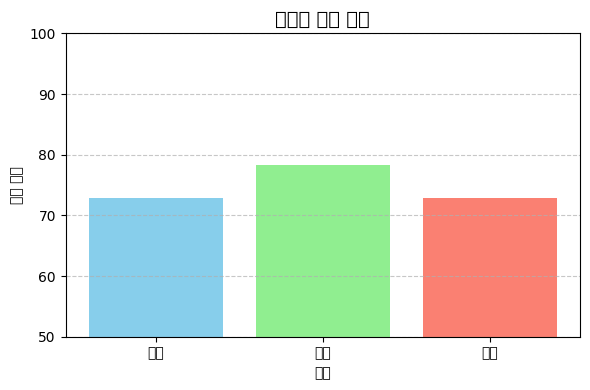

C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1275149877.py:48: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1275149877.py:48: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1275149877.py:48: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1275149877.py:48: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1275149877.py:48: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\1275149877.py:48: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu S

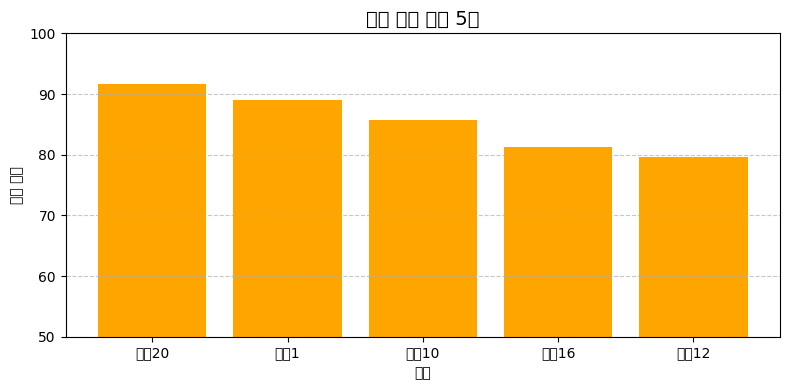

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class StudentScoreAnalysis:
    def __init__(self):
        # 학생 이름: 학생1 ~ 학생20
        self.students = [f'학생{i}' for i in range(1, 21)]
        
        # 과목별 점수: 수학, 영어, 과학 (50 ~ 100)
        np.random.seed(42)  # 재현 가능성 확보
        self.scores = {
            '수학': np.random.randint(50, 101, size=20),
            '영어': np.random.randint(50, 101, size=20),
            '과학': np.random.randint(50, 101, size=20)
        }
        
        # DataFrame 생성
        self.df = pd.DataFrame(self.scores, index=self.students)
        # 학생별 평균 열 추가
        self.df['평균'] = self.df.mean(axis=1)

    def plot_subject_means(self):
        """과목별 평균 점수 막대그래프 시각화"""
        subject_means = self.df[['수학', '영어', '과학']].mean()

        plt.figure(figsize=(6, 4))
        plt.bar(subject_means.index, subject_means.values, color=['skyblue', 'lightgreen', 'salmon'])
        plt.title('과목별 평균 점수', fontsize=14)
        plt.xlabel('과목')
        plt.ylabel('평균 점수')
        plt.ylim(50, 100)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    def plot_top5_students(self):
        """평균 성적 상위 5명 막대그래프 시각화"""
        top5 = self.df.sort_values(by='평균', ascending=False).head(5)

        plt.figure(figsize=(8, 4))
        plt.bar(top5.index, top5['평균'], color='orange')
        plt.title('평균 성적 상위 5명', fontsize=14)
        plt.xlabel('학생')
        plt.ylabel('평균 점수')
        plt.ylim(50, 100)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    def display_dataframe(self):
        """데이터프레임 출력"""
        print(self.df)

# 실행 예시
if __name__ == "__main__":
    analysis = StudentScoreAnalysis()
    analysis.display_dataframe()      # 전체 데이터 출력
    analysis.plot_subject_means()     # 과목별 평균 시각화
    analysis.plot_top5_students()     # 상위 5명 시각화


    고객명       구매일자  상품명  수량    단가    총매출
0   고객7 2024-01-12  상품C   4  2982  11928
1   고객4 2024-06-10  상품B   1  1853   1853
2   고객8 2024-02-02  상품A   4  1050   4200
3   고객5 2024-02-17  상품B   3  4736  14208
4   고객7 2024-05-30  상품B   4  4769  19076
5  고객10 2024-03-02  상품B   3  1574   4722
6   고객3 2024-02-06  상품C   4  4261  17044
7   고객7 2024-04-08  상품C   1  2148   2148
8   고객8 2024-06-20  상품A   4  3197  12788
9   고객5 2024-04-13  상품A   1  3361   3361


C:\Users\ez\AppData\Local\Temp\ipykernel_1624\605929971.py:40: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\605929971.py:40: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\605929971.py:40: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\605929971.py:40: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\605929971.py:40: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\605929971.py:40: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  

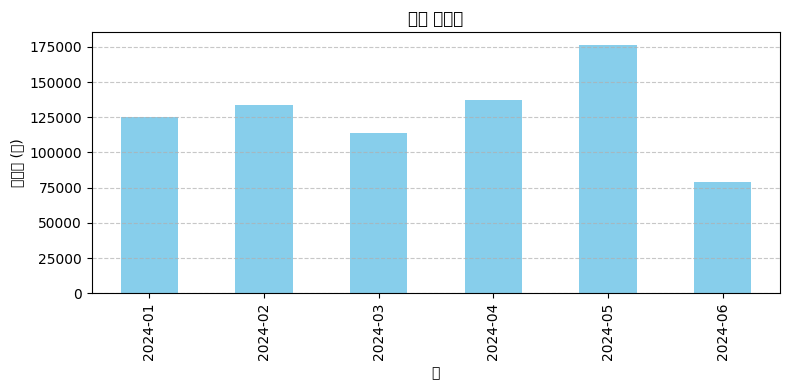

C:\Users\ez\AppData\Local\Temp\ipykernel_1624\605929971.py:50: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\605929971.py:50: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\605929971.py:50: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\605929971.py:50: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\605929971.py:50: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ez\AppData\Local\Temp\ipykernel_1624\605929971.py:50: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  plt

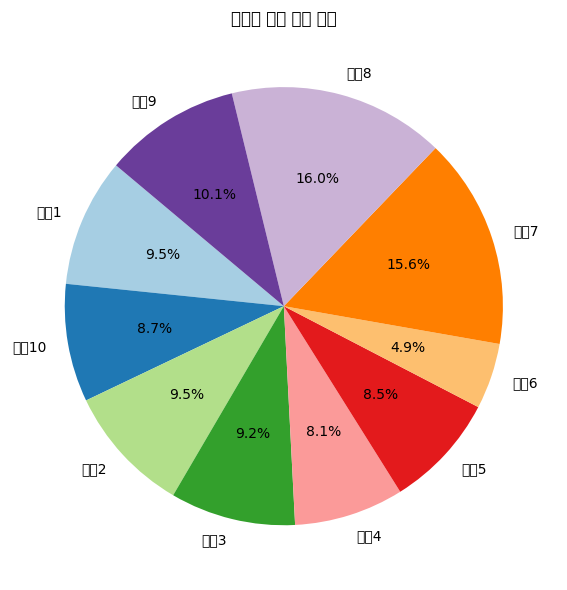

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class CustomerSalesAnalysis:
    def __init__(self):
        #구매 데이터 초기화
        np.random.seed(42)  # 결과 재현 가능하게
        
        # 고객명 10명 (고객1 ~ 고객10)
        self.customers = [f'고객{i}' for i in range(1, 11)]
        
        # 구매일자 (2024년 1월 ~ 6월 중 랜덤)
        self.purchase_dates = pd.date_range(start='2024-01-01', end='2024-06-30', freq='D')
        
        # 데이터 생성
        data = {
            '고객명': np.random.choice(self.customers, 100),
            '구매일자': np.random.choice(self.purchase_dates, 100),
            '상품명': np.random.choice(['상품A', '상품B', '상품C'], 100),
            '수량': np.random.randint(1, 5, size=100),
            '단가': np.random.randint(1000, 5000, size=100)
        }
        
        self.df = pd.DataFrame(data)
        # 총매출 컬럼 추가
        self.df['총매출'] = self.df['수량'] * self.df['단가']

    def plot_monthly_sales(self):
        #월별 총매출 막대그래프
        self.df['월'] = self.df['구매일자'].dt.to_period('M')  # '2024-01' 형식
        monthly_sales = self.df.groupby('월')['총매출'].sum()

        plt.figure(figsize=(8, 4))
        monthly_sales.plot(kind='bar', color='skyblue')
        plt.title('월별 총매출')
        plt.xlabel('월')
        plt.ylabel('총매출 (원)')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    def plot_customer_contribution(self):
        #고객별 누적 매출 파이차트
        customer_sales = self.df.groupby('고객명')['총매출'].sum()

        plt.figure(figsize=(6, 6))
        plt.pie(customer_sales, labels=customer_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
        plt.title('고객별 누적 매출 비율')
        plt.tight_layout()
        plt.show()

    def display_dataframe(self):
        print(self.df.head(10))  # 상위 10개만 출력

if __name__ == "__main__":
    analysis = CustomerSalesAnalysis()
    analysis.display_dataframe()          # 생성된 데이터 확인
    analysis.plot_monthly_sales()         # 월별 총매출 막대그래프
    analysis.plot_customer_contribution() # 고객별 누적 매출 파이차트


In [2]:
import re
import csv
# 로그 파일 경로
log_file_path = 'sample_logs.txt'
output_csv_path = 'parsed_logs.csv'

In [4]:
# 정규 표현식 패턴 정의
log_pattern = re.compile(
r'(?P<ip>\d+\.\d+\.\d+\.\d+)\s' # IP 주소
 r'- - \[(?P<datetime>[^\]]+)\] ' # 날짜 및 시간
 r'"(?P<method>GET|POST|PUT|DELETE|HEAD) ' # HTTP 메서드
 r'(?P<path>[^ ]+).*?"\s' # 요청 경로
 r'(?P<status>\d{3})\s' # 상태 코드
 r'(?P<size>\d+)' # 응답 크기
)

In [7]:
# 파싱된 결과 저장 리스트
parsed_logs = []
# 로그 파일 읽기 및 정규식 적용
with open(log_file_path, 'r') as f:
    for line in f:
        match = log_pattern.search(line)
    if match:
        parsed_logs.append(match.groupdict())

In [8]:
parsed_logs

[{'ip': '172.17.185.151',
  'datetime': '14/Jun/2025:11:25:39 +0900',
  'method': 'POST',
  'path': '/submit',
  'status': '404',
  'size': '189'}]

In [10]:
# CSV로 저장
with open(output_csv_path, 'w', newline='') as csvfile:
    fieldnames = ['ip', 'datetime', 'method', 'path', 'status', 'size']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for entry in parsed_logs:
        writer.writerow(entry)
print("보안 로그가 CSV로 저장되었습니다:", output_csv_path)

보안 로그가 CSV로 저장되었습니다: parsed_logs.csv


In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

In [13]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [16]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>